Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

The below link provided is for downloading the dataset. 

In [1]:
#importing liraries
import pandas as pd					# data manipulation using dataframes
import numpy as np					# data statistical analysis

import seaborn as sns				# Statistical data visualization
import matplotlib.pyplot as plt		# data visualisation
%matplotlib inline

In [2]:
raw_df = pd.read_csv("Advertising.csv")			# to import .csv file

In [3]:
df = raw_df.copy()			# copy of initial dataset


In [4]:
#Data Inspection¶
df.head()



,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:

df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
#There is huge spending on TV advertisement on an average 147,000 dollars and minimum on radio of 23,000 dollars


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.shape

(200, 5)

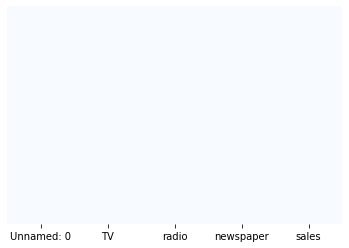

In [9]:
#Data Cleaning¶
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues' )


In [10]:
df.isnull().sum()			# to get total values in column


Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [11]:
# Data is clean



/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


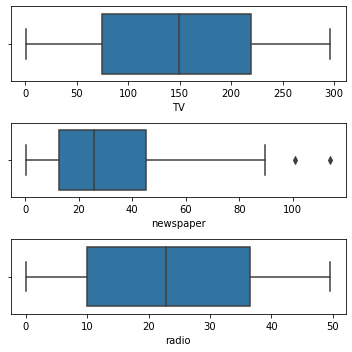

In [12]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

In [13]:
#There are no considerable outliers present in data

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


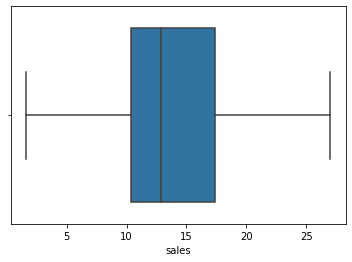

In [14]:
#Exploratory Data Analysis¶
sns.boxplot(df['sales'])
plt.show()

In [15]:
df['sales'].mean()

14.0225

There is no outlier present in target Sales
There is average sales of about 14.0225 dollars

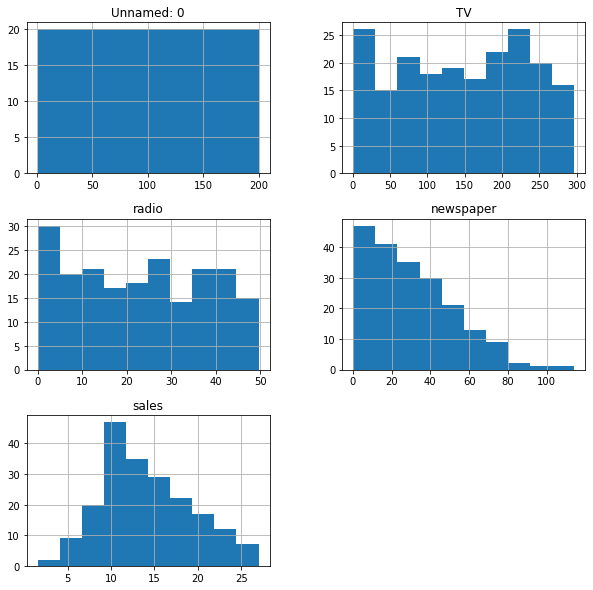

In [16]:
#Features (Predictors): to check all variables at once

df.hist( bins = 10, figsize = (10,10))
plt.show()

In [17]:
#No skewness is noticed
#Spending budget for advertisments on TV is in all range, same for Radio but less than TV. But on newspapers, less budget is spend


/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


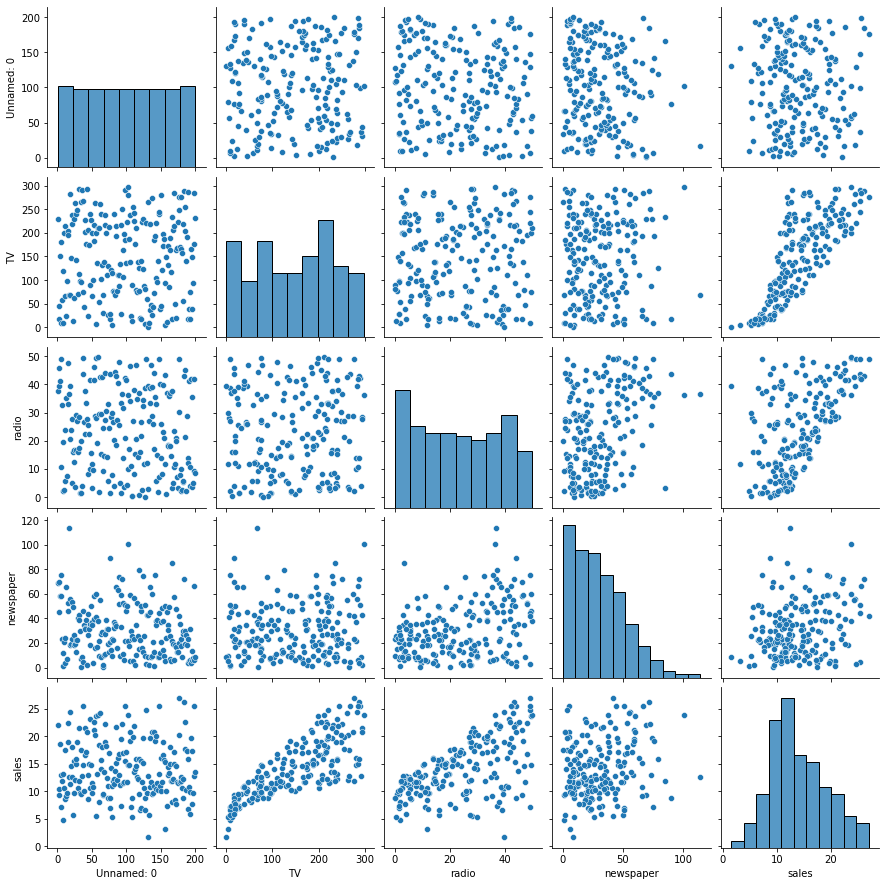

In [18]:
sns.pairplot(df, size=2.5)
plt.show()

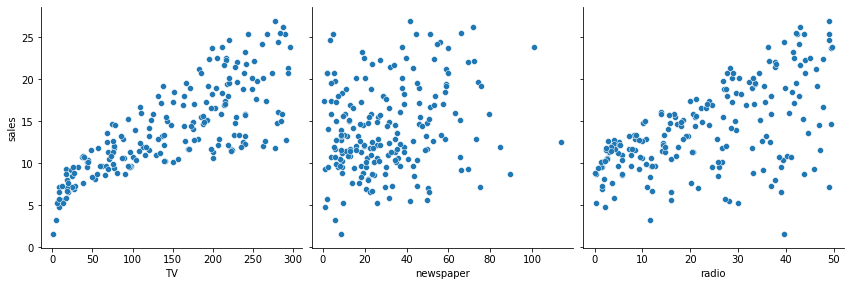

In [19]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'newspaper', 'radio'], y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

Target Sales is directly correlated with TV, little with Radio but there is no correlation with Newspaper.

There is no correlation seems between all features.

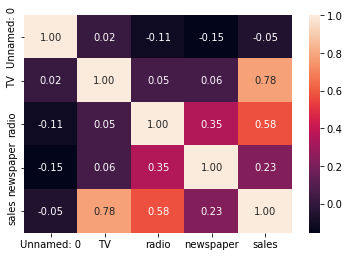

In [20]:
#Let's check with values.
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")


As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales

 So let's go ahead and perform simple linear regression using TV as our feature variable.


In [21]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [22]:
X = df['TV']
y = df['sales']

Train-Test Split¶
You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

Building a Linear Model¶
You first need to import the statsmodel.api library using which you'll perform the linear regression.

In [24]:
import statsmodels.api as sm

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

In [25]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [27]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           2.84e-30
Time:                        15:20:29   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

Looking at some key statistics from the summary
The values we are concerned with are -

The coefficients and significance (p-values)
R-squared
F statistic and its significance
1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

Sales=6.948+0.054×TV

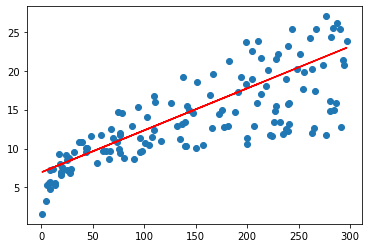

In [28]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

#Model Evaluation¶

Residual analysis
To validate assumptions of the model, and hence the reliability for inference

Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [29]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

/srv/conda/envs/notebook/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


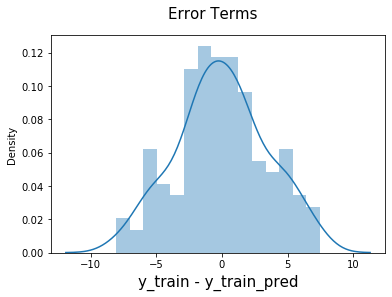

In [30]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

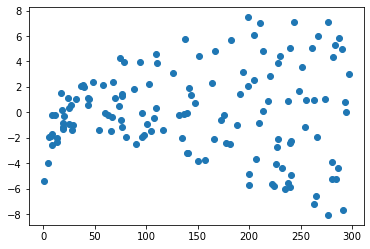

In [31]:
#The residuals are following the normally distributed with a mean 0.Great!
#Looking for patterns in the residuals¶
plt.scatter(X_train,res)
plt.show()


We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

Predictions on the Test Set
Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the X_test data like you did for X_train and then you can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [32]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

/srv/conda/envs/notebook/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327003

In [35]:
#Checking the R-squared on the test set¶
r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783303

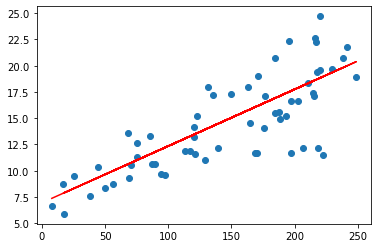

In [36]:
#Visualizing the fit on the test set¶
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

In [37]:
#Data Preprocessing¶

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [38]:
### Splitting Dataset ###

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)

In [39]:
#Model Training
### Simple Linear Regression/ Multiple Linear Regression ###

from sklearn.linear_model import LinearRegression
regressor = LinearRegression( fit_intercept = True)

regressor.fit(X_train, y_train)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print(f"Linear coefficients : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Linear coefficients : [0.00064359 0.04471835 0.18925118 0.00304577]
Intercept : 2.906527086361802


In [41]:
#Model Prediction
y_pred = regressor.predict(X_test)



In [42]:
#Metrices: RMSE

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Root Mean Squared Error: 1.7885761008659646


In [43]:
# R-squared

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8986489151417082

Tuning
Estimate the relevancy of the coefficients

Now that you have coefficients, how can you tell if they are relevant to predict your target?

The best way is to find the p-value. The p-value is used to quantify statistical significance; it allows to tell whether the null hypothesis is to be rejected or not.

The null hypothesis?

For any modelling task, the hypothesis is that there is some correlation between the features and the target. The null hypothesis is therefore the opposite: there is no correlation between the features and the target.

So, finding the p-value for each coefficient will tell if the variable is statistically significant to predict the target. As a general rule of thumb, if the p-value is less than 0.05: there is a strong relationship between the variable and the target.

In [44]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     425.7
Date:                Tue, 21 Sep 2021   Prob (F-statistic):           3.94e-95
Time:                        15:20:30   Log-Likelihood:                -386.14
No. Observations:                 200   AIC:                             782.3
Df Residuals:                     195   BIC:                             798.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0052      0.394      7.623      0.0

P value

Looking at all coefficients, we have a p-value that is very low (although it is probably not exactly 0) for TV and Radio. This means that there is a strong correlation between these coefficients and the target (Sales).

Of course, we notice that the third coefficient (the one for newspaper) has a large p-value 0.954. Therefore, ad spending on newspaper is not statistically significant. Removing that predictor would slightly reduce the R² value, but we might make better predictions.

R² value and Adj. R² value

Then, looking at the R² value and Adj. R² value, we have 0.9. Therefore, about 90% of the variability of sales is explained by the amount spent on all ads

F-statistic

This is a good indicator of whether there is a relationship between Y and X. The further our F-statistic is away from 1, the better our regression model.The F-statistic is 605.4. This is much greater than 1, and since our data set if fairly small (only 200 data points), it demonstrates that there is a strong relationship between ad spending and sales.

std error

The coefficient standard error, as mentioned above, measures how much our coefficient estimates vary from the actual average value of our response variable. In other words, it measures the accuracy of coefficient estimates. The closer our standard error is to zero, the better.

t-value

The coefficient t-value measures how far (in standard deviations) our coefficient estimate is from 0. A large t-value, relative to standard error, would provide evidence against the null hypothesis and indicate that a relationships exists between the predictor and response variables. Predictors with low t-statistics can be dropped. Ideally, the t-value should be greater than 1.96 for a p-value to be less than 0.05.

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn import metrics
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score

In [46]:
lnrg = LinearRegression()

lnrg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
feature_cols=df.columns[1:4]
feature_cols

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [48]:
#formula of linear regression is y = bias + [coef1]x1 + [coef2]x2 + [coef3]x3... 

print("linear regression bias or intercept   => ",lnrg.intercept_)   #intercept=bias
print("linear regression coefficient         => ",lnrg.coef_)
print("feature columns                       => ",feature_cols)

linear regression bias or intercept   =>  2.906527086361802
linear regression coefficient         =>  [0.00064359 0.04471835 0.18925118 0.00304577]
feature columns                       =>  Index(['TV', 'radio', 'newspaper'], dtype='object')


In [49]:
y_hat = lnrg.predict(X_test)
print( np.sqrt(metrics.mean_squared_error(y_test,y_hat)) )

#the less score the better

1.7885761008659646


In [50]:
# Root Mean Square error wth TV and radio as features 
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=df[feature_cols]
    Y=df.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.6946202070474572

In [51]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=df[feature_cols]
    Y=df.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += np.sqrt(metrics.mean_squared_error(y_test,y_hat))
score/1000

1.7082841032858305

In [52]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio']   
    X=df[feature_cols]
    Y=df.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.93297042597613

In [53]:
score=0
for i in range(0,1000):
    feature_cols = ['TV','radio','newspaper']   
    X=df[feature_cols]
    Y=df.sales
    x_train,x_test,y_train,y_test=train_test_split(X,Y)
    lnrg = LinearRegression()
    lnrg.fit(x_train,y_train)
    y_hat = lnrg.predict(x_test)
    score += metrics.mean_squared_error(y_test,y_hat)
score/1000

2.9560257935387853

In [54]:
#using cross validation to check best features¶
#all features
feature_cols = ['TV','radio','newspaper']
X=df[feature_cols]
Y=df.sales
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores  #cross_val_score give result in negative result so we negate it to get positive result
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

# the less the better

1.6913531708051792


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Depreca

In [55]:

# with some features
feature_cols = ['TV','radio']
X=df[feature_cols]
Y=df.sales
lnrg = LinearRegression()

scores=cross_val_score(lnrg,X,Y,cv=10,scoring='neg_mean_squared_error')
mse_scores= -scores
rmse_scores=np.sqrt(mse_scores)
print(rmse_scores.mean())

1.6796748419090766


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Depreca

In [59]:
import pickle
filename='Adver_Sales.pkl'
pickle.dump(lnrg,open(filename,'wb'))

In [61]:
#Conclusion
import pickle
loaded_model=pickle.load(open('Adver_Sales.pkl','rb'))